# Exploratory Data Analysis

Here will will explore various views of our Yelp_Api data in order to discover insights about our two food types in each region.

To begin, we import the CSV file we saved from the previous yelp_api script.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import numpy as np  
import folium
from folium.plugins import MarkerCluster
import requests
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

In [2]:
df = pd.read_csv("yelp_master_data.csv")

In [3]:
df.head()

,Unnamed: 0,name,price,rating,review_count,category,city,latitude,longitude
0,0,Jajaja,2.000000,4.5,580,vegan,new york,40.714153,-73.990425
1,1,Spicy Moon,1.905941,5.0,26,vegan,new york,40.726740,-73.987220
2,2,Le Botaniste,1.905941,4.5,78,vegan,new york,40.720428,-74.000203
3,3,Ramen Hood,2.000000,4.5,102,vegan,new york,40.722311,-73.997377
4,4,Bali Kitchen,2.000000,4.5,96,vegan,new york,40.725371,-73.987617


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 9 columns):
Unnamed: 0      1493 non-null int64
name            1493 non-null object
price           1493 non-null float64
rating          1493 non-null float64
review_count    1493 non-null int64
category        1493 non-null object
city            1493 non-null object
latitude        1493 non-null float64
longitude       1493 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 105.1+ KB


# Summary Analysis

We create a new DataFrame with just summary statistics to allow us to see quick comparisons by city.

### Population of matching 40km radius

In [5]:
pop = {'Portland':1907395, 
'Los Angeles':10055380, 
'New York City':13409590, 
'Boston':3342667, 
'Chicago':6377851, 
'Austin':1142575, 
'Miami':3140501, 
'Tulsa':757571, 
'Minneapolis':2648228, 
'San Diego':2684215,
'san francisco':5027241}

In [6]:
# creating a new dataframed named cities_df
cities = ['portland','los angeles','new york','boston','chicago','austin','miami','tulsa','minneapolis','san diego','san francisco']


In [7]:
def get_number_of_restaurants(city,restaurant_type):
    return df.loc[(df['city'] == city) & (df['category'] == restaurant_type)].shape[0]

In [8]:
# create a function that sums price per city per category: vegan, steak
def get_sum(city,restaurant_type):
    return df.loc[(df['city'] == city) & (df['category'] == restaurant_type)].price.sum()

In [9]:
cities_df = pd.DataFrame({'city':cities})

#adding vegan_count column to cities_df dataframe
cities_df['veg_count'] = cities_df['city'].map(lambda x :get_number_of_restaurants(x,'vegan') )

#adding steak_count column to cities_df dataframe
cities_df['steak_count'] = cities_df['city'].map(lambda x :get_number_of_restaurants(x,'steak') )

# adding a population column to cities_df dataframe
cities_df['pop'] = [float(x) for x in list(pop.values())]

# adding a per capita column to cities_df dataframe to give steak restaurants per capita per city
cities_df['steak_capita'] = cities_df['steak_count'] / cities_df['pop']
cities_df['veg_capita'] = cities_df['veg_count'] / cities_df['pop']

cities_df['steak_rating_mean'] = cities_df['city'].map(lambda x :get_sum(x,'steak') )/cities_df['steak_count']
cities_df['veg_rating_mean'] = cities_df['city'].map(lambda x :get_sum(x,'vegan') )/ cities_df['veg_count']

# adding price sum column per city for steak restaurants
cities_df['steak_$mean'] = cities_df['city'].map(lambda x :get_sum(x,'steak') )/ cities_df['steak_count']
cities_df['veg_$mean'] = cities_df['city'].map(lambda x :get_sum(x,'vegan') )/ cities_df['veg_count']


# adding longitude and latitude to cities_df dataframe
cities_df['latitude'] = df.latitude
cities_df['longitude'] = df.longitude

#setting the index to the city
cities_df.set_index('city', drop=True, inplace=True)

In [ ]:
cities_df.head(15)


In [10]:
# setting up the folium map with longitude and latitude
map_hooray = folium.Map(location = [36.10220015729658, -95.9271240234375], tiles="Stamen Terrain",
                    zoom_start = 4)

# adding 11 city markers
folium.Marker(
    location=[45.515785397030584, -122.65411376953125],
    popup='Portland',
    icon=folium.Icon(color='green')
).add_to(map_hooray)

folium.Marker(
    location=[34.0615895441259, -118.32138061523438],
    popup='Los Angeles',
    icon=folium.Icon(color='green')
).add_to(map_hooray)

folium.Marker(
    location=[40.70544486444615, -73.99429321289062],
    popup='New York City',
    icon=folium.Icon(color='green')
).add_to(map_hooray)

folium.Marker(
    location=[42.34784169448538, -71.07124328613281],
    popup='Boston',
    icon=folium.Icon(color='green')
).add_to(map_hooray)

folium.Marker(
    location=[41.90515925618311, -87.67776489257812],
    popup='Chicago',
    icon=folium.Icon(color='green')
).add_to(map_hooray)

folium.Marker(
    location=[30.305156315977833, -97.75772094726562],
    popup='Austin',
    icon=folium.Icon(color='green')
).add_to(map_hooray)

folium.Marker(
    location=[25.752753731496888, -80.2880859375],
    popup='Miami',
    icon=folium.Icon(color='green')
).add_to(map_hooray)


folium.Marker(
    location=[36.10220015729658, -95.9271240234375],
    popup='Tulsa',
    icon=folium.Icon(color='green')
).add_to(map_hooray)


folium.Marker(
    location=[44.96558443188442, -93.2904052734375],
    popup='Minneapolis',
    icon=folium.Icon(color='green')
).add_to(map_hooray)

folium.Marker(
    location=[32.790569394537286, -117.15408325195312],
    popup='San Diego',
    icon=folium.Icon(color='green')
).add_to(map_hooray)


folium.Marker(
    location=[37.76089938976322, -122.43644714355469],
    popup='San Francisco',
    icon=folium.Icon(color='green')
).add_to(map_hooray)


# setting up MarkerCluster
marker_cluster = MarkerCluster().add_to(map_hooray)

# preparing dataset
locations = df[['latitude', 'longitude']]
locationlist = locations.values.tolist()

# assigning the total vegan, steak restaurants to each city in MarkerCluster
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['name'][point]).add_to(marker_cluster)

              
map_hooray


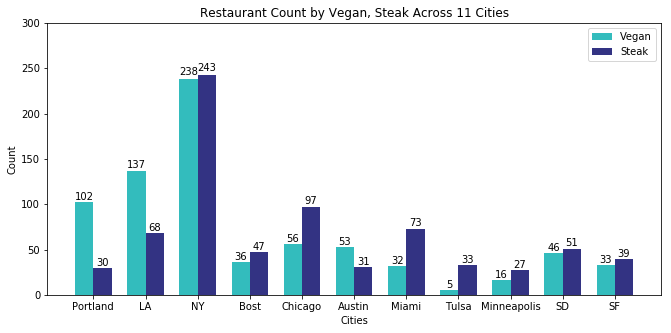

In [11]:

# creating a bar chart to show no. of restaurants by city and category: steak/vegan

n_groups = 11

# restaurant sum Port, LA, NY, Bos, Chi, Aus, Miami, Tulsa, Minn, SD, SF
vegan_count = (102, 137, 238, 36, 56, 53, 32, 5, 16, 46, 33)
steak_count = (30, 68, 243, 47, 97, 31, 73, 33, 27, 51, 39)

# setting up the bar chart
fig, ax = plt.subplots(figsize=(11, 5))

index = np.arange(n_groups)
bar_width = .35

opacity = 0.8
error_config = {'ecolor': '.3'}

rects1 = ax.bar(index, vegan_count, bar_width,
                alpha=opacity, color='#00ACAD',
                error_kw=error_config,
                label='Vegan')

rects2 = ax.bar(index + bar_width, steak_count, bar_width,
                alpha=opacity, color='#000064',
                error_kw=error_config,
                label='Steak')

# setting up labels
ax.set_xlabel('Cities')
ax.set_ylabel('Count')
ax.set_title('Restaurant Count by Vegan, Steak Across 11 Cities')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Portland', 'LA', 'NY', 'Bost', 'Chicago', 'Austin', 'Miami', 'Tulsa', 'Minneapolis', 'SD', 'SF'))
ax.legend()

# adding bar height
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.ylim((0,300))

plt.show()



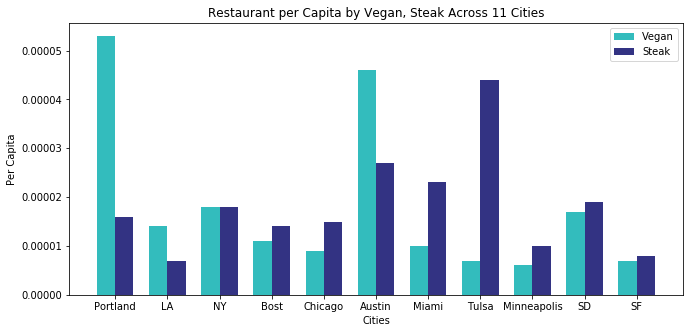

In [12]:
#vegan, steak colors
#colors = [‘rgb(0, 0, 100)’, ‘rgb(0, 200, 200)’]
# creating a bar chart to show restaurant per capita by city and category: steak/vegan

n_groups = 11

# per capita Port, LA, NY, Bos, Chi, Aus, Miami, Tulsa, Minn, SD, SF
vegan_per_capita = (0.000053, 0.000014, 0.000018, 0.000011, 0.000009, 0.000046, 0.000010, 0.000007, 0.000006, 0.000017, 0.000007)
steak_per_capita = (0.000016, 0.000007, 0.000018, 0.000014, 0.000015, 0.000027, 0.000023, 0.000044, 0.000010, 0.000019, 0.000008)


# setting up the bar chart
fig, ax = plt.subplots(figsize=(11, 5))

index = np.arange(n_groups)
bar_width = .35

opacity = 0.8
error_config = {'ecolor': '.3'}

rects3 = ax.bar(index, vegan_per_capita, bar_width,
                alpha=opacity, color='#00ACAD',
                error_kw=error_config,
                label='Vegan')

rects4 = ax.bar(index + bar_width, steak_per_capita, bar_width,
                alpha=opacity, color='#000064',
                error_kw=error_config,
                label='Steak')

# setting up labels
ax.set_xlabel('Cities')
ax.set_ylabel('Per Capita')
ax.set_title('Restaurant per Capita by Vegan, Steak Across 11 Cities')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Portland', 'LA', 'NY', 'Bost', 'Chicago', 'Austin', 'Miami', 'Tulsa', 'Minneapolis', 'SD', 'SF'))
ax.legend()



plt.show()


In [13]:
pop = {'Portland':1907395, 
'Los Angeles':10055380, 
'New York City':13409590, 
'Boston':3342667, 
'Chicago':6377851, 
'Austin':1142575, 
'miami':3140501, 
'tulsa':757571, 
'Minneapolis':2648228, 
'San Diego':2684215}